Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [2]:
#loading the csv data to a pandas Dataframe
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [3]:
#print first 10 rows of the dataframe
gold_data.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [4]:
#print the last 10 rows of the dataset
gold_data.tail(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
2280,4/30/2018,2648.050049,124.589996,13.8000,15.3800,1.208123
2281,5/1/2018,2654.800049,123.709999,13.6100,15.2400,1.199156
2282,5/2/2018,2635.669922,123.650002,13.6700,15.4200,1.195100
2283,5/3/2018,2629.729980,124.279999,13.8200,15.4600,1.198926
2284,5/7/2018,2672.629883,124.570000,14.1000,15.5200,1.193374
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# find the information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
#find the missing value of the dataset
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
#find the size of the dataset
gold_data.shape

(2290, 6)

In [8]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

1.Positive Correlation
2.Negative Correlation

In [9]:
correlation=gold_data.corr()

<ipython-input-9-a848558ce65b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


<Axes: >

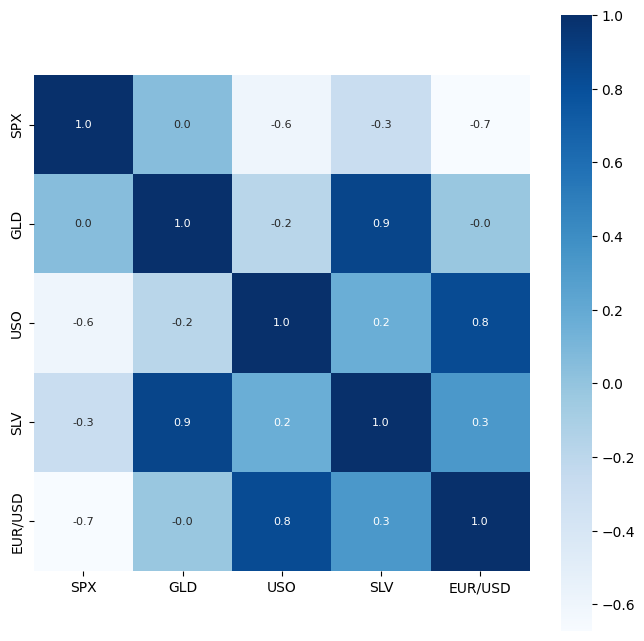

In [10]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [13]:
#correlation values  for the gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-14-91d42ce9d5a9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

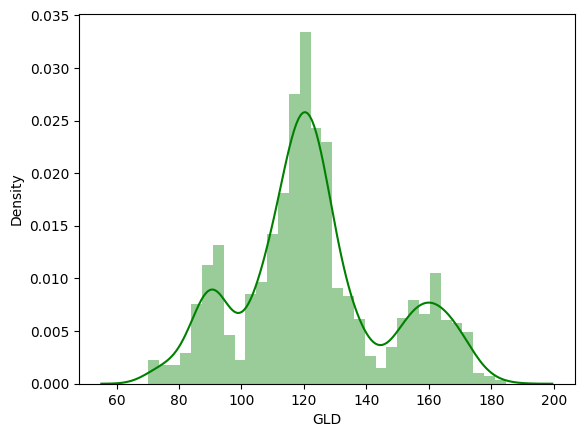

In [14]:
#checking the distribution of the GLD price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Feature of The target

In [16]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [17]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and test data


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

Model Training

Random Forest Regression

In [19]:
regressor=RandomForestRegressor(n_estimators=100)

In [20]:
#training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [21]:
#prediction on the test data
test_data_prediction=regressor.predict(x_test)

In [22]:
print(test_data_prediction)

[168.65119937  81.97689953 115.91410008 127.67610057 120.77740132
 154.7323979  150.36179861 125.8708005  117.43789858 125.7732016
 116.38240155 171.82430114 141.65719853 167.88439833 115.23679996
 117.4802006  139.23010393 170.11400047 159.10990335 156.2007999
 155.17910013 125.15660006 176.01239957 157.35600388 125.19030076
  93.66299984  77.22349991 120.54580009 118.99109908 167.54580021
  88.1059009  125.26760024  91.05030073 117.6677001  121.08329906
 135.96850042 115.34310142 115.20710078 148.37469969 107.32520083
 104.60200278  87.08839783 126.50440081 117.74420012 153.42979907
 119.6373004  108.56599992 108.10059828  93.29360059 127.14009769
  75.25970052 113.6926991  121.23130017 111.35499925 118.95869888
 120.84879911 158.44010031 168.88490053 146.95949674  86.00619905
  94.35750059  86.84099921  90.60039986 118.94850056 126.51630083
 127.55500009 169.81739954 122.19399942 117.31679918  98.66209999
 167.86700079 142.70909798 132.37980196 121.09300201 121.17849973
 119.6079005

In [23]:
#R squared error
error_score=metrics.r2_score(y_test,test_data_prediction)
print('R squared error',error_score)

R squared error 0.9882758621494513


In [24]:
#compare the Actual value and predictive value in the plot
y_test=list(y_test)

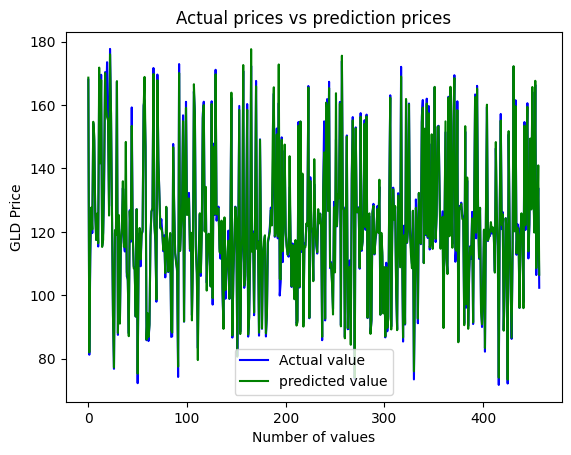

In [25]:
plt.plot(y_test,color='blue',label='Actual value')
plt.plot(test_data_prediction,color='green',label='predicted value')
plt.title('Actual prices vs prediction prices')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()